In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',10)

In [5]:
name = ['name','sex','births']
names1880 = pd.read_csv('yob1880.txt',names = name )
names1880 

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [8]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [10]:
piece = []
years =range(1880,2011)

for year in years:
    path = 'yob%d.txt'%year
    frame = pd.read_csv(path,names = name)
    
    frame['year'] = year
    piece.append(frame)
    
names = pd.concat(piece,ignore_index = True)
# 必须指定ignore_index=True，因为我们不希望保留read_csv所返回的原始行号。

In [11]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [15]:
total_birth = names.pivot_table('births',index = 'year',columns = 'sex',aggfunc = 'sum')
total_birth['total'] = total_birth['F'] +total_birth['M']
total_birth

sex,F,M,total
year,,,
1880,90993,110493,201486
1881,91955,100748,192703
1882,107851,113687,221538
1883,112322,104632,216954
1884,129021,114445,243466
...,...,...,...
2006,1896468,2050234,3946702
2007,1916888,2069242,3986130
2008,1883645,2032310,3915955


UsageError: unrecognized arguments: line


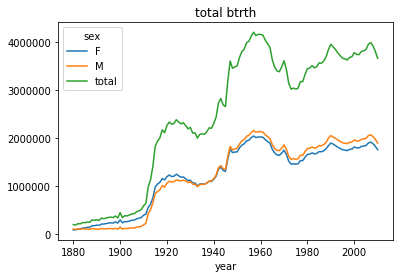

In [17]:
total_birth.plot(title = 'total btrth')
%matplotlib in line

In [20]:
names.groupby(['year','sex']).size()

year  sex
1880  F        942
      M       1058
1881  F        938
      M        997
1882  F       1028
             ...  
2008  M      14590
2009  F      20123
      M      14479
2010  F      19698
      M      14140
Length: 262, dtype: int64

In [30]:
def add_group(group):
    group['pop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_group)
# pop数据存储的是当前姓名出生人数在当年同性别中所占d的比例
names


,name,sex,births,year,pop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [27]:
names.groupby(['year','sex']).births.sum()

year  sex
1880  F        90993
      M       110493
1881  F        91955
      M       100748
1882  F       107851
              ...   
2008  M      2032310
2009  F      1827643
      M      1973359
2010  F      1759010
      M      1898382
Name: births, Length: 262, dtype: int64

In [32]:
names.groupby(['year','sex']).pop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: pop, Length: 262, dtype: float64

In [38]:
def get_top1000(group):
    return group.sort_values(by = 'births',ascending = False)[:1000]
    
top1000 = names.groupby(['year','sex']).apply(get_top1000)

top1000
# pieces = []
# for year, group in names.groupby(['year', 'sex']):
#     pieces.append(group.sort_values(by='births', ascending=False)[:1000])
# top1000 = pd.concat(pieces, ignore_index=True)

# 作者：SeanCheney
# 链接：https://www.jianshu.com/p/72b6c83bb69e

name sex  births  year       pop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [41]:
top1000.reset_index(inplace = True,drop = True)
top1000

,name,sex,births,year,pop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [44]:
boys = top1000[top1000.sex =='M']
boys

,name,sex,births,year,pop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [45]:
girls = top1000[top1000.sex =='F']
girls

,name,sex,births,year,pop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


In [49]:
total_birth = top1000.pivot_table('births',index = 'year',columns = 'name',aggfunc = 'sum')
total_birth

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
total_birth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [108]:
subset = total_birth[['John','Mary','Harry','Zoie']]
subset
subset.John.isna().value_counts()
subset

name,John,Mary,Harry,Zoie
year,,,,
1880,9701.0,7092.0,2158.0,NaN
1881,8795.0,6948.0,2002.0,NaN
1882,9597.0,8179.0,2246.0,NaN
1883,8934.0,8044.0,2116.0,NaN
1884,9427.0,9253.0,2338.0,NaN
...,...,...,...,...
2006,15140.0,4073.0,414.0,530.0
2007,14405.0,3665.0,443.0,526.0
2008,13273.0,3478.0,379.0,492.0


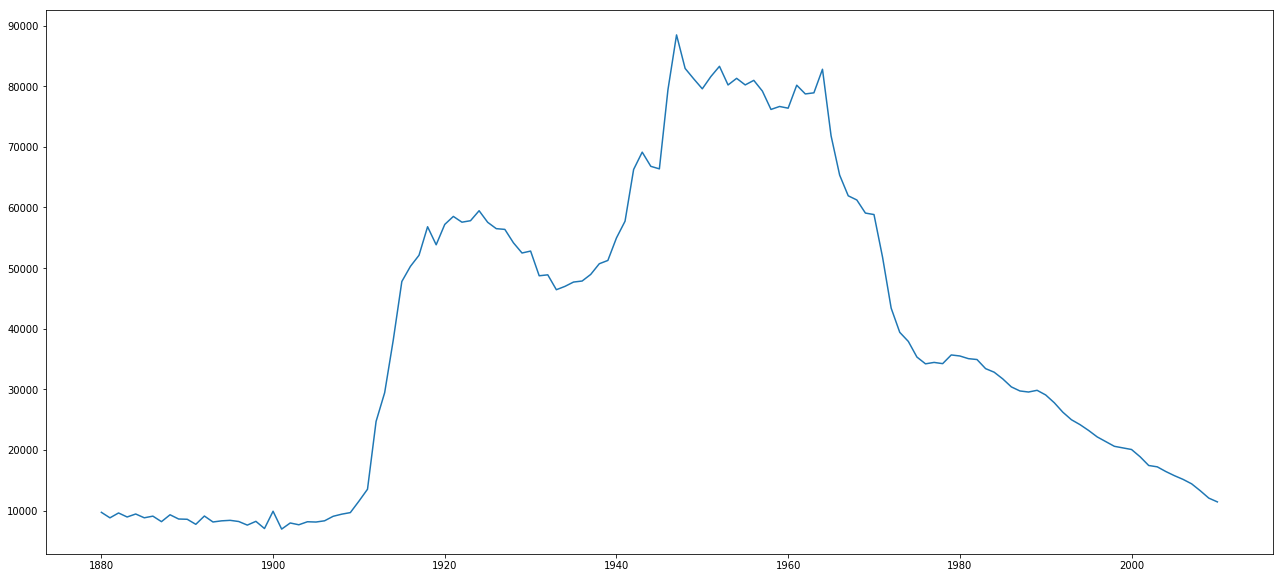

In [104]:
import matplotlib.pyplot as plt
x = subset.index
y = subset.John
plt.figure(figsize=(22, 10))
plt.plot(x,y,)
plt.show()
% matplotlib inline

In [83]:
subset.index

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
           dtype='int64', name='year', length=131)

In [94]:
y = subset.John
y

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9427.0
         ...   
2006    15140.0
2007    14405.0
2008    13273.0
2009    12048.0
2010    11424.0
Name: John, Length: 131, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001BF7EFD0>,
      dtype=object)

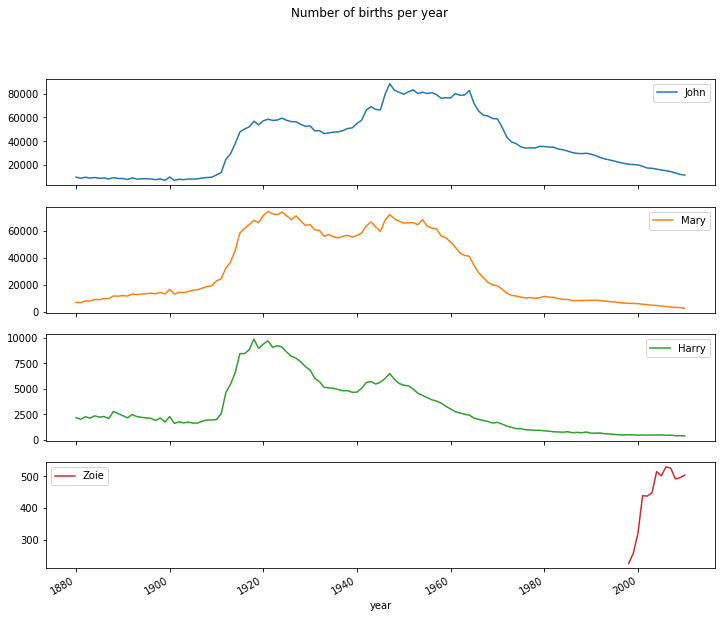

In [109]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,title="Number of births per year")

In [110]:
# 评估命名多样性的增长
# 一种解释是父母愿意给小孩起常见的名字越来越少。
# 这个假设可以从数据中得到验证。一个办法是计算最流行的1000个名字所占的比例，
# 我按year和sex进行聚合并绘图
table = top1000.pivot_table('pop',index = 'year',columns = 'sex',aggfunc = 'sum')
table

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


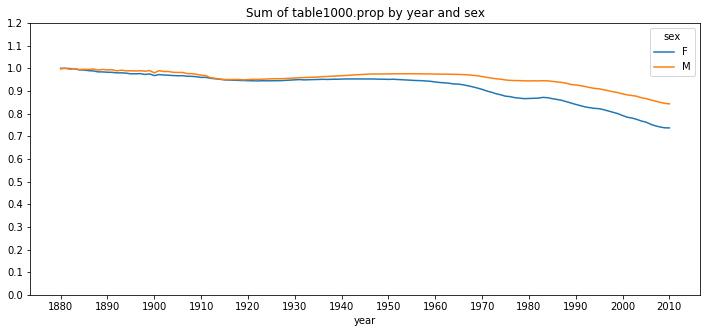

In [126]:
table.plot(yticks = np.linspace(0,1.2,13),xticks = range(1880,2020,10),title ='Sum of table1000.prop by year and sex',figsize=(12, 5))
# 前1000项的比例降低,名字的多样性确实出现了增长

In [118]:
x = range(1880,2020,10)
print(x)

range(1880, 2020, 10)


In [119]:
 np.linspace(0,1.2,13)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2])

In [121]:
range(1880,2020,10)

range(1880, 2020, 10)

In [127]:
top1000


,name,sex,births,year,pop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [150]:
top1000.sort_values(by = 'pop',ascending = False)
# 先计算prop的累计和cumsum，然后再通过searchsorted方法找出0.5应该被插入在哪个位置才能保证不破坏顺序：

def get_quantile_count(group, q=0.5):
    group = group.sort_values(by = 'pop',ascending = False)
    return group['pop'].cumsum().values.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [147]:
top1000.sort_values(by = 'pop',ascending = False)['pop'].cumsum()

942         0.087381
2880        0.174420
943         0.260697
6877        0.345700
2881        0.430307
             ...    
153875    245.313145
153876    245.313172
147876    245.313198
147875    245.313225
145876    245.313251
Name: pop, Length: 261877, dtype: float64

In [138]:
series = pd.Series([1,2,3,4,5])


In [139]:
series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [141]:
series.cumsum()

0     1
1     3
2     6
3    10
4    15
dtype: int64

In [142]:
top1000.pop.cumsum()

AttributeError: 'function' object has no attribute 'cumsum'

In [146]:
top1000['pop'].cumsum()


0           0.077643
1           0.106261
2           0.128274
3           0.149583
4           0.168771
             ...    
261872    245.312843
261873    245.312945
261874    245.313047
261875    245.313149
261876    245.313251
Name: pop, Length: 261877, dtype: float64